<a href="https://colab.research.google.com/github/adityakolluru/Projects/blob/master/Logistic_Regression%2C_Simple_NN_%26_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#imports. Using PyTorch and fastai

%matplotlib inline
from fastai.basics import * #High Level Library for PyTorch
import torch.nn as nn

In [0]:
#experimenting on the MNIST Dataset

!wget http://deeplearning.net/data/mnist/mnist.pkl.gz

--2019-01-24 03:17:16--  http://deeplearning.net/data/mnist/mnist.pkl.gz
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16168813 (15M) [application/x-gzip]
Saving to: ‘mnist.pkl.gz’

mnist.pkl.gz        100%[===================>]  15.42M  4.48MB/s    in 4.1s    

2019-01-24 03:17:21 (3.72 MB/s) - ‘mnist.pkl.gz’ saved [16168813/16168813]



In [0]:
path = Path('/content/')

In [0]:
with gzip.open(path/'mnist.pkl.gz', 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

5

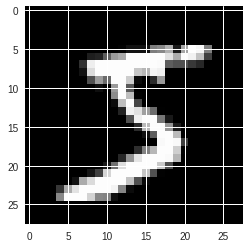

In [0]:
plt.imshow(x_train[0].reshape((28,28)), cmap="gray")
y_train[0]


In [0]:
#Data size

(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape)

((50000, 784), (50000,), (10000, 784), (10000,))

In [0]:
#Convert to PyTorch Tensors

x_train,y_train,x_valid,y_valid = map(torch.tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train.shape, y_train.min(), y_train.max(), x_valid.shape, y_valid.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


(torch.Size([50000, 784]),
 tensor(0),
 tensor(9),
 torch.Size([10000, 784]),
 torch.Size([10000]))

In [0]:
#Creating dataloaders

bs=64
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
data = DataBunch.create(train_ds, valid_ds, bs=bs)

In [0]:
#iterating through one minibatch

x,y = next(iter(data.train_dl))
x.shape,y.shape

(torch.Size([64, 784]), torch.Size([64]))

In [0]:
def get_weights(*dims): return nn.Parameter(torch.randn(dims)/dims[0])
def softmax(x): return torch.exp(x)/(torch.exp(x).sum(dim=1)[:,None])

In [0]:
#Logistic Regression using one linear layer

class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10, bias=True)

    def forward(self, xb): return self.lin(xb)

In [0]:
model = Mnist_Logistic().cuda()


In [0]:
model(x).shape

torch.Size([64, 10])

In [0]:
[p.shape for p in model.parameters()]


[torch.Size([10, 784]), torch.Size([10])]

In [0]:
#Learning Rate

lr=2e-2


In [0]:
#Loss Function

loss_func = nn.CrossEntropyLoss()

In [0]:
#Learner

learn = Learner(data, Mnist_Logistic(), loss_func=loss_func, metrics=accuracy)

learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.306866,0.269406,0.925000


In [0]:
#Optimizer

opt=optim.Adam(model.parameters())


In [0]:
class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784, 50, bias=True)
        self.lin2 = nn.Linear(50, 10, bias=True)

    def forward(self, xb):
        x = self.lin1(xb)
        x = F.relu(x)
        return self.lin2(x)

In [0]:
model_1 = Mnist_NN()

In [0]:
opt=optim.Adam(model_1.parameters())


In [0]:
learn = Learner(data, Mnist_NN(), loss_func=loss_func, metrics=accuracy)

learn.fit(4, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.211122,0.170331,0.951400
2,0.147628,0.185620,0.951600
3,0.122270,0.136008,0.965200
4,0.112348,0.166707,0.961000


In [0]:
learn.lr_find()


epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


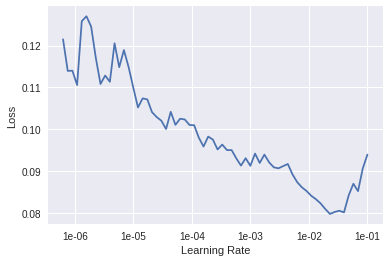

In [0]:
learn.recorder.plot()

In [0]:
learn = Learner(data, Mnist_NN(), loss_func=loss_func, metrics=accuracy)

learn.fit(10, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.209541,0.157331,0.952600
2,0.154722,0.136731,0.960900
3,0.134542,0.147969,0.958600
4,0.122346,0.173839,0.954100
5,0.103461,0.143784,0.963400
6,0.096738,0.138159,0.964700
7,0.104489,0.131753,0.968200
8,0.108192,0.156134,0.961900
9,0.088670,0.185240,0.962200
10,0.082747,0.160308,0.962500
